#패션 MNIST 데이터 셋을 이용해서 딥러닝 연습하기 


MNIST는 손으로 쓴 0~9까지의 숫자로 이루어져있고, 

MNIST와 크기, 개수가 동일하지만 
숫자 대신 패션 아이템으로 이루어진 데이터를 말함 


## 데이터셋? 


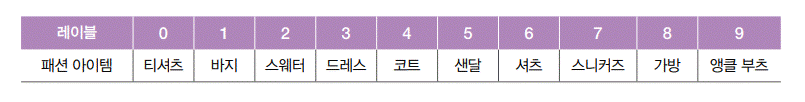

In [32]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [33]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [34]:
#다운받은 데이터의 크기 확인 

print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


=> 

훈련 데이터는 60,000개의 이미지로 이루어져있고 이미지는 28x28 크기이다

타깃 데이터는 60,000개의 원소가 있는 1차원 배열

In [35]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


테스트 세트는 10,000개의 이미지로 이루어져있음

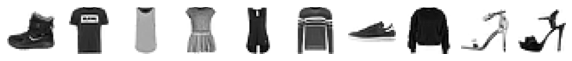

In [36]:
#훈련 데이터의 몇 개의 샘플을 그림으로 출력

import matplotlib.pyplot as plt 
fig,axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [37]:
#처음 10개의 타깃값을 리스트로 만든 후 출력 

print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [38]:
# unique() 함수로 레이블 당 샘플 개수를 확인 

import numpy as np 
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


0~9까지 레이블마다 6,000개의 샘플이 들어있음을 확인함 

###로지스틱 회귀로 패션 아이템 분류하기 

SGDClassifier 클래스의 loss 매개변수를 'log'로 지정하여 로지스틱 손실 함수를 최소화하는 확률적 경사 하강법 모델을 만들었는데 이것을 패션 MNIST에도 적용할 것임 

In [39]:
#SGDClassifier는 2차원 입력을 다루지 못하기 때문에 1차원 배열로 만들어야함 

train_scaled = train_input/ 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [40]:
print(train_scaled.shape)

(60000, 784)


784개의 픽셀로 이루어진 60,000개의 샘플이 준비되어 있음 
 

In [41]:
#SGDClassifier 클래스와 cross_validate 함수를 사용해 이 데이터에서 교차검증으로 성능을 확인

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier 
sc= SGDClassifier(loss='log', max_iter=5, random_state=42)
scores= cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

#0.8195666666666668

0.8195666666666668


In [42]:
#반복횟수 9 
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier 
sc= SGDClassifier(loss='log', max_iter=5, random_state=42)
scores= cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

#0.8195666666666668

0.8195666666666668


In [43]:
#반복횟수 20 
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier 
sc= SGDClassifier(loss='log', max_iter=5, random_state=42)
scores= cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

#0.8195666666666668

0.8195666666666668


반복 횟수를 늘려도 0.8195666666666668 동일한 값이 출력되었음,,, 

In [46]:
#텐서플로우를 import 하는 방법?
import tensorflow as tf

#케라스를 import 하는 방법?
from tensorflow import keras

#인공 신경망으로 모델 만들기 

인공신경망은 검증 세트를 별도로 덜어낸다 

이유?

(1) 딥러닝 분야의 데이터셋은 충분히 크기에 검증 점수가 안정적 

(2) 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸리기 때문 

In [47]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

훈련 세트에서 20%를 검증 세트로 덜어냄 

In [48]:
#훈련세트와 검증세트의 크기를 확인
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [50]:
#케라스의 Dense 클래스를 이용해 밀집층 만들기 

dense= keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#10 - 뉴런의 개수 
#activate='softmax'  -뉴런의 출력에 적용할 함수 
#input_shape=(784,) -입력의 크기

activation='softmax' -> 다중분류 

activation='sigmoid' -> 이진분류 

뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화함수라고 한다 

In [51]:
#이 밀집층을 가진 신경망 모델을 만들기 

model = keras.Sequential(dense)

In [52]:
#훈련 전 설정 단계 

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

케라스의 두 손실 함수 

- 이진 분류: loss = 'binary_crossentropy'
- 다중 분류: loss = 'categorical_crossentropy' 

In [53]:
#패션 MNIST 데이터의 타깃값?

print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [54]:
#모델을 훈련
#epochs 매개변수로 몇 번 반복할 것인지 설정 

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 2ms/step - loss: 0.6058 - accuracy: 0.7932
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4785 - accuracy: 0.8385
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4564 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4435 - accuracy: 0.8539
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4358 - accuracy: 0.8551


In [55]:
#모델의 성능을 평가

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4579 - accuracy: 0.8483


[0.4579426348209381, 0.8483333587646484]